<a href="https://colab.research.google.com/github/GIRI1817/Pulse-Code-Modulation/blob/main/EXP_3_2_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

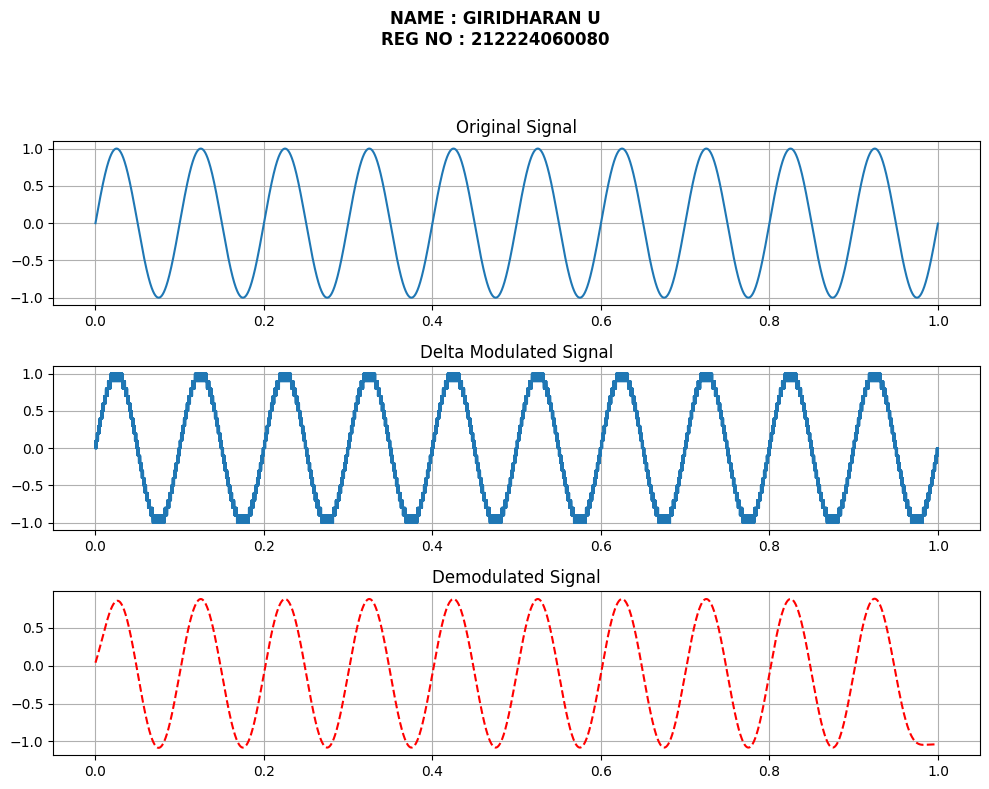

In [1]:
#Delta Modulation

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parameters
fs, fm, T, delta = 10000, 10, 1, 0.1
t = np.arange(0, T, 1/fs)

# Message signal
m = np.sin(2*np.pi*fm*t)

# Delta Modulation (Encoder)
dm = np.zeros_like(m)
bits = np.zeros_like(m)
for i in range(1, len(m)):
    if m[i] > dm[i-1]:
        bits[i] = 1
        dm[i] = dm[i-1] + delta
    else:
        dm[i] = dm[i-1] - delta

# Delta Demodulation
rec = np.cumsum((2*bits - 1) * delta)

# Low-pass filter
b, a = butter(4, 20/(0.5*fs), 'low')
rec_filt = filtfilt(b, a, rec)

# Plot
plt.figure(figsize=(10,8))
plt.suptitle("NAME : GIRIDHARAN U\nREG NO : 212224060080",
             fontsize=12, fontweight='bold')

plt.subplot(3,1,1)
plt.plot(t, m)
plt.title("Original Signal")
plt.grid(True)

plt.subplot(3,1,2)
plt.step(t, dm, where='mid')
plt.title("Delta Modulated Signal")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, rec_filt, 'r--')
plt.title("Demodulated Signal")
plt.grid(True)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()
